## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, RMSprop, Adagrad

## Import Dataset

In [2]:
data = pd.read_csv('seeds\seeds_dataset.csv')
data

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## Show dataset info

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
 7   type                     210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB
None


## Descriptive Statistics

In [4]:
data.describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


## Missing Values

In [5]:
data.isnull().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
type                       0
dtype: int64

## Duplicated Values

In [6]:
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [area , perimeter , compactness, length of kernel, width of kernel, asymmetry coefficient, length of kernel groove, type]
Index: []


## Label encoding
convert categorical variables into numerical format

In [7]:
lableEn = LabelEncoder()
X = data.drop('type',axis=1)
y = lableEn.fit_transform(data['type'])

## Standardize the features

In [8]:
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)

## Data Standardization/Normalization Plots

Text(0.5, 1.0, 'After Scaling')

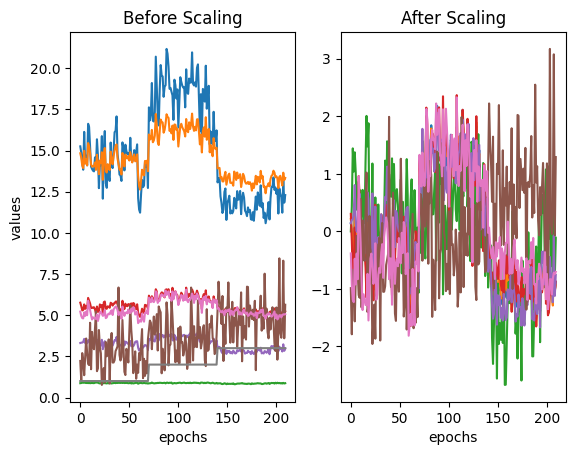

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(data)
ax1.set_xlabel('epochs')
ax1.set_ylabel('values')
ax1.set_title('Before Scaling')
ax2.plot(X_scaled)
ax2.set_xlabel('epochs')
ax2.set_title('After Scaling')

## Univariate Analysis

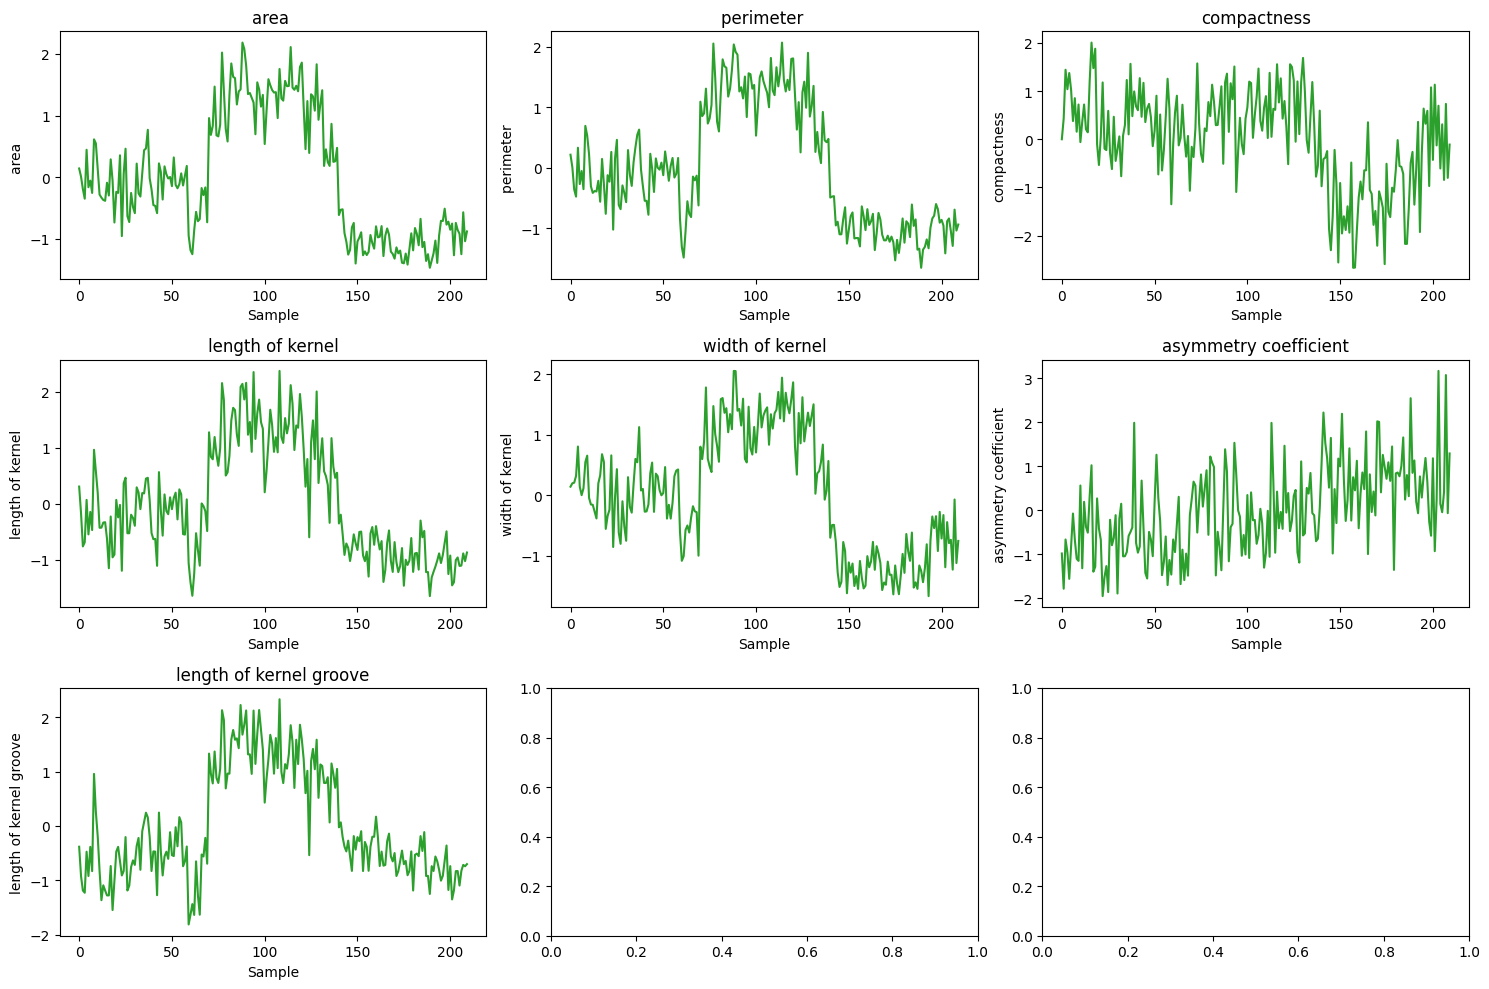

In [10]:
num_columns = 7

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

columns_names = data.columns  

for i in range(3):
    for j in range(3):
        index = i * 3 + j
        if index < num_columns:
            ax = axes[i, j]

            feature_data = X_scaled.iloc[:, index] 
            ax.plot(feature_data,color='tab:green')
            

            ax.set_xlabel('Sample')
            ax.set_ylabel(columns_names[index])
            ax.set_title(columns_names[index])

plt.tight_layout()
plt.show()

## Bivariate analysis 

<Figure size 1200x800 with 0 Axes>

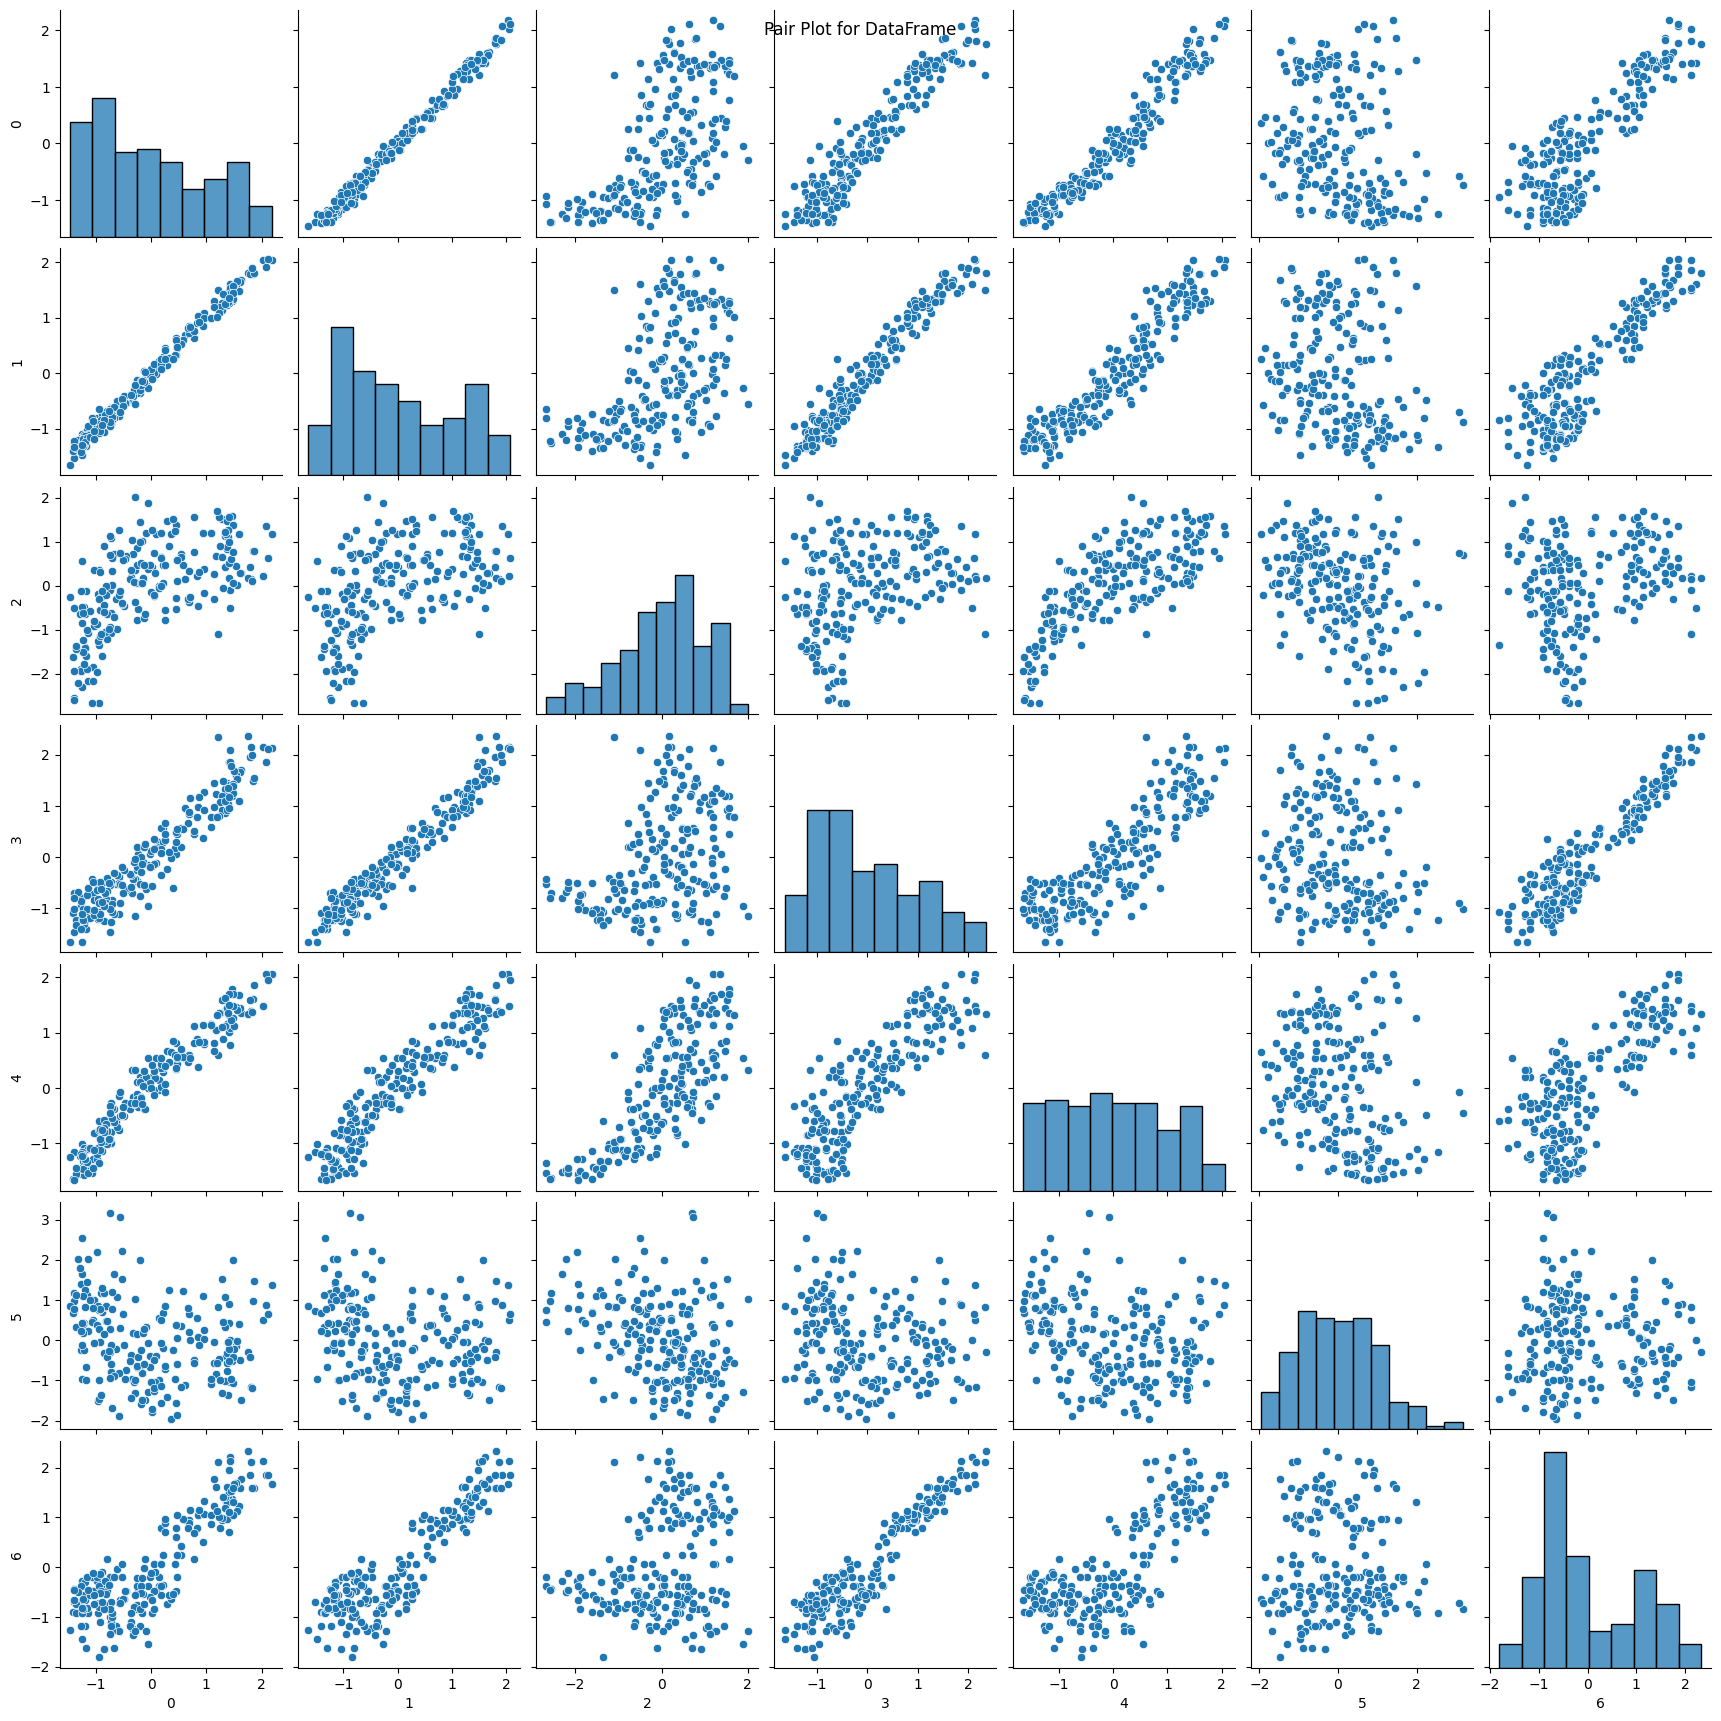

In [11]:
sns.color_palette("dark:#5A9_r", as_cmap=True)
plt.figure(figsize=(12, 8))
sns.pairplot(X_scaled)
plt.suptitle('Pair Plot for DataFrame')
plt.show()


 ## Evaluating skewness

In [12]:
X_scaled.skew()

0    0.399889
1    0.386573
2   -0.537954
3    0.525482
4    0.134378
5    0.401667
6    0.561897
dtype: float64

## Functions to plot accuracy and error

In [13]:
def plot_accuracy(model_history):
    plt.figure(figsize=(6, 4))
    plt.plot(model_history.history['accuracy'], 'tab:orange')
    plt.plot(model_history.history['val_accuracy'], 'tab:purple')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.show()
def plot_error(model_history):
    plt.figure(figsize=(6, 4))
    plt.plot(model_history.history['loss'], 'tab:green')
    plt.plot(model_history.history['val_loss'], 'tab:red')
    plt.title('Training and Validation Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend(['Training Error', 'Validation Error'], loc='upper right')
    plt.show()

## Split the data into train and test sets

In [14]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

## Define the ANN Model no:1

In [15]:
model_1 = Sequential()
model_1.add(Dense(20, activation='relu', input_shape=(7,)))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(3, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model_1.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                160       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 643 (2.51 KB)
Trainable params: 643 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the model

In [16]:
history_1 = model_1.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[callbacks.History()])

Epoch 1/100
6/6 [==============================] - 1s 59ms/step - loss: 1.2272 - accuracy: 0.2738 - val_loss: 1.1397 - val_accuracy: 0.0476
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 1.0882 - accuracy: 0.2560 - val_loss: 1.0522 - val_accuracy: 0.3333
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 1.0574 - accuracy: 0.3214 - val_loss: 1.0025 - val_accuracy: 0.3810
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0119 - accuracy: 0.3452 - val_loss: 0.9645 - val_accuracy: 0.5238
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.9818 - accuracy: 0.4405 - val_loss: 0.9442 - val_accuracy: 0.5238
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.9545 - accuracy: 0.5060 - val_loss: 0.9128 - val_accuracy: 0.5238
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.9378 - accuracy: 0.4226 - val_loss: 0.8884 - val_accuracy: 0.5714
Epoch 8/100
6/6 [=======

## Evaluate the model

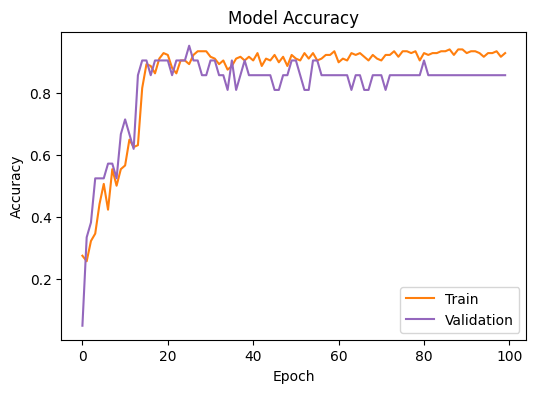

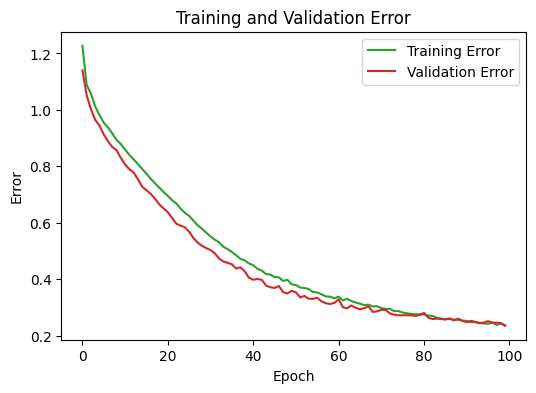

1/1 [==============================] - 0s 28ms/step - loss: 0.2981 - accuracy: 0.9048
Test Accuracy: 0.9048


In [17]:
plot_accuracy(history_1)
plot_error(history_1)

test_loss, test_acc = model_1.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

## Define the ANN Model no:2

In [18]:
model_2 = Sequential()
model_2.add(Dense(30, activation='relu', input_shape=(7,)))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(3, activation='softmax'))

optimizer = Adagrad(learning_rate=0.001)
model_2.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                240       
                                                                 
 dense_4 (Dense)             (None, 20)                620       
                                                                 
 dense_5 (Dense)             (None, 3)                 63        
                                                                 
Total params: 923 (3.61 KB)
Trainable params: 923 (3.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the model

In [19]:
history_2 = model_2.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[callbacks.History()])

Epoch 1/100
6/6 [==============================] - 1s 49ms/step - loss: 4.9346 - accuracy: 0.3512 - val_loss: 4.0130 - val_accuracy: 0.3333
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 4.2198 - accuracy: 0.3512 - val_loss: 3.5461 - val_accuracy: 0.3333
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 3.7756 - accuracy: 0.3512 - val_loss: 3.1881 - val_accuracy: 0.3333
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 3.4362 - accuracy: 0.3512 - val_loss: 2.9350 - val_accuracy: 0.3333
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 3.1794 - accuracy: 0.3512 - val_loss: 2.7025 - val_accuracy: 0.3333
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 2.9426 - accuracy: 0.3512 - val_loss: 2.4974 - val_accuracy: 0.3333
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 2.7299 - accuracy: 0.3512 - val_loss: 2.3276 - val_accuracy: 0.3333
Epoch 8/100
6/6 [=======

## Evaluate the model

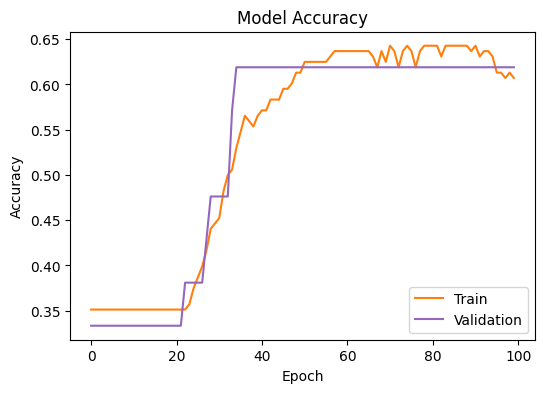

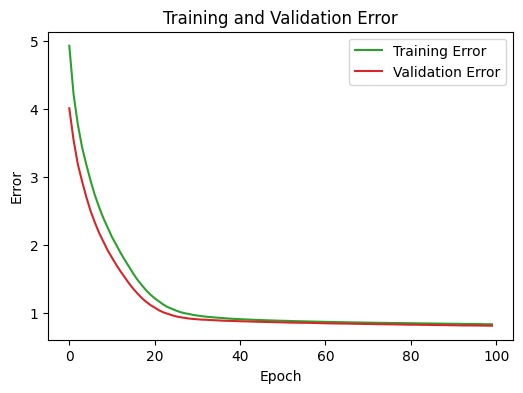

1/1 [==============================] - 0s 36ms/step - loss: 0.8617 - accuracy: 0.4762
Test Accuracy: 0.4762


In [20]:
plot_accuracy(history_2)
plot_error(history_2)

test_loss, test_acc = model_2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

## Define the ANN Model no:3

In [21]:
model_3 = Sequential()
model_3.add(Dense(10, activation='relu', input_shape=(7,)))
model_3.add(Dense(10, activation='relu'))
model_3.add(Dense(3, activation='softmax'))

optimizer = SGD(learning_rate=0.001)
model_3.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                80        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 3)                 33        
                                                                 
Total params: 223 (892.00 Byte)
Trainable params: 223 (892.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the model

In [22]:
history_3 = model_3.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[callbacks.History()])

Epoch 1/100
6/6 [==============================] - 1s 47ms/step - loss: 2.8446 - accuracy: 0.3333 - val_loss: 1.9519 - val_accuracy: 0.2857
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 1.5674 - accuracy: 0.3393 - val_loss: 1.3119 - val_accuracy: 0.2857
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 1.1736 - accuracy: 0.3512 - val_loss: 1.1923 - val_accuracy: 0.3333
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0974 - accuracy: 0.3988 - val_loss: 1.1493 - val_accuracy: 0.3333
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0636 - accuracy: 0.3690 - val_loss: 1.1361 - val_accuracy: 0.2857
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0524 - accuracy: 0.3393 - val_loss: 1.1169 - val_accuracy: 0.2381
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 1.0380 - accuracy: 0.3571 - val_loss: 1.0955 - val_accuracy: 0.2381
Epoch 8/100
6/6 [=========

## Evaluate the model

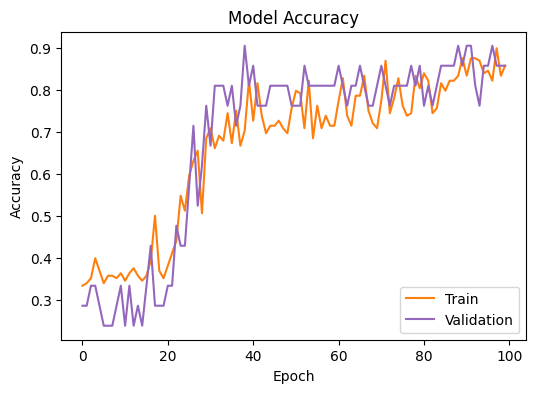

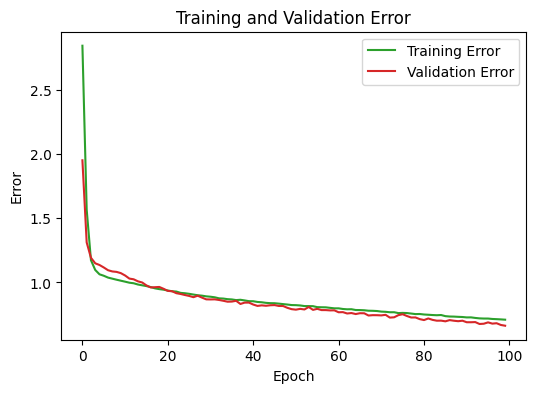

1/1 [==============================] - 0s 29ms/step - loss: 0.7248 - accuracy: 0.8095
Test Accuracy: 0.8095


In [23]:
plot_accuracy(history_3)
plot_error(history_3)

test_loss, test_acc = model_3.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

## Define the ANN Model no:4

In [24]:
model_4 = Sequential()
model_4.add(Dense(6, activation='relu', input_shape=(7,)))
model_4.add(Dense(10, activation='relu'))
model_4.add(Dense(3, activation='softmax'))

optimizer = RMSprop(learning_rate=0.001)
model_4.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 48        
                                                                 
 dense_10 (Dense)            (None, 10)                70        
                                                                 
 dense_11 (Dense)            (None, 3)                 33        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the model

In [25]:
history_4 = model_4.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[callbacks.History()])

Epoch 1/100
6/6 [==============================] - 1s 98ms/step - loss: 1.3201 - accuracy: 0.2738 - val_loss: 1.2870 - val_accuracy: 0.2857
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 1.2299 - accuracy: 0.2679 - val_loss: 1.2169 - val_accuracy: 0.2381
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 1.1952 - accuracy: 0.2143 - val_loss: 1.1914 - val_accuracy: 0.1905
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 1.1786 - accuracy: 0.1786 - val_loss: 1.1723 - val_accuracy: 0.1429
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 1.1627 - accuracy: 0.1190 - val_loss: 1.1609 - val_accuracy: 0.3810
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 1.1504 - accuracy: 0.2738 - val_loss: 1.1511 - val_accuracy: 0.3810
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 1.1417 - accuracy: 0.3214 - val_loss: 1.1402 - val_accuracy: 0.3810
Epoch 8/100
6/6 [=======

## Evaluate the model

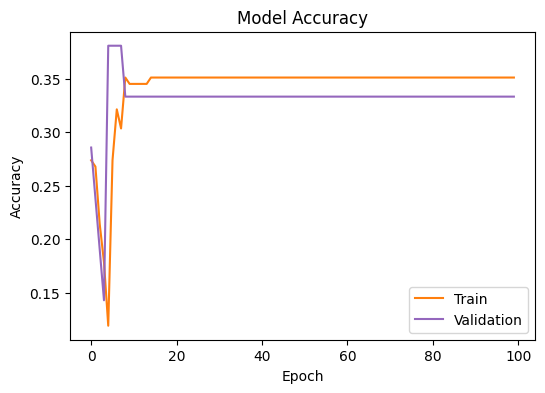

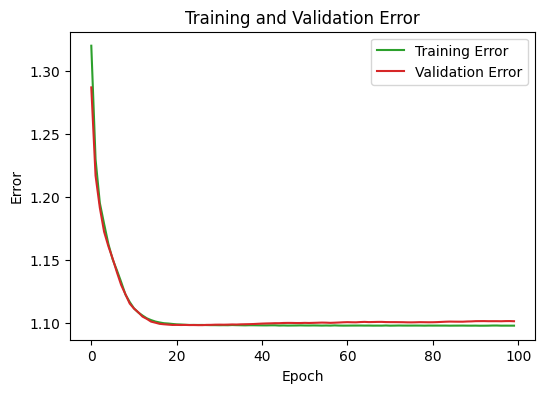

1/1 [==============================] - 0s 25ms/step - loss: 1.1106 - accuracy: 0.1905
Test Accuracy: 0.1905


In [26]:
plot_accuracy(history_4)
plot_error(history_4)

test_loss, test_acc = model_4.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")